# Python Pandas를 이용한 데이터프레임 재구조화 - 주요 메서드 
## 다음의 메서드들이 각각 어떤 역할을 하는지 배웁니다 

 - pd.pivot()
 - pd.pivot_table()
 - pd.melt()
 - pd.concat(

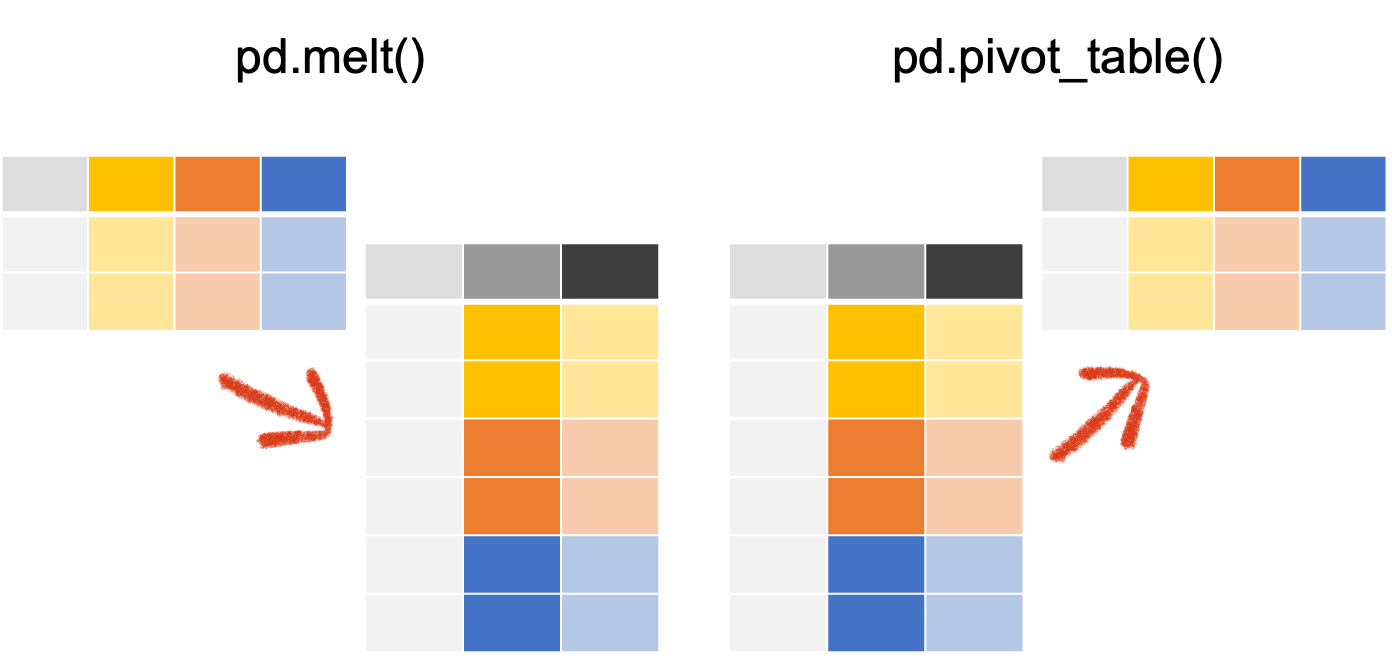

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.DataFrame(
        {"date" : ["2023-07-01","2023-07-01", "2023-07-01", "2023-07-01", "2023-07-01"] ,
        "category1" : ["메인", "메인", "사이드", "음료", "사이드"] ,
        "category2" : ["양념치킨", "간장치킨", "치즈볼", "콜라", "감자튀김"],
        "count" : [1, 2, 1, 4, 1], 
        "price" : [20000, 50000, 6000, 8000, 8000]})

In [3]:
df

,date,category1,category2,count,price
0,2023-07-01,메인,양념치킨,1,20000
1,2023-07-01,메인,간장치킨,2,50000
2,2023-07-01,사이드,치즈볼,1,6000
3,2023-07-01,음료,콜라,4,8000
4,2023-07-01,사이드,감자튀김,1,8000


## pd.pivot()

In [4]:
#date를 기준으로 category2의 판매수량은?
df.pivot(index = "date", 
         columns = "category2", 
         values = "count" )

category2,간장치킨,감자튀김,양념치킨,치즈볼,콜라
date,,,,,
2023-07-01,2,1,1,1,4


In [5]:
#category2를 기준으로 7월 1일의 판매가격은?
df.pivot(index = "category2", 
         columns = "date", 
         values = "price" )

date,2023-07-01
category2,
간장치킨,50000
감자튀김,8000
양념치킨,20000
치즈볼,6000
콜라,8000


In [6]:
#여러개 value도 확인가능 
df.pivot(index = "category1", 
         columns = "category2", 
         values = ["count","price"] )

count                        price                                 
category2  간장치킨 감자튀김 양념치킨  치즈볼   콜라     간장치킨    감자튀김     양념치킨     치즈볼      콜라
category1                                                                    
메인          2.0  NaN  1.0  NaN  NaN  50000.0     NaN  20000.0     NaN     NaN
사이드         NaN  1.0  NaN  1.0  NaN      NaN  8000.0      NaN  6000.0     NaN
음료          NaN  NaN  NaN  NaN  4.0      NaN     NaN      NaN     NaN  8000.0

In [7]:
#인덱스는 없어도 되지만, 컬럼은 꼭 있어야 합니다 
df.pivot(index = "category2", values = "count" )

TypeError: pivot() missing 1 required keyword-only argument: 'columns'

In [8]:
df.pivot(columns = "category2", values = "count" )

category2,간장치킨,감자튀김,양념치킨,치즈볼,콜라
0,NaN,NaN,1.0,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,4.0
4,NaN,1.0,NaN,NaN,NaN


In [10]:
df

,date,category1,category2,count,price
0,2023-07-01,메인,양념치킨,1,20000
1,2023-07-01,메인,간장치킨,2,50000
2,2023-07-01,사이드,치즈볼,1,6000
3,2023-07-01,음료,콜라,4,8000
4,2023-07-01,사이드,감자튀김,1,8000


In [9]:
## 에러발생! 중복된 값때문에 재구조화 할 수 없음 (메인에해당하는 price 값도 2개, 사이드 price 값도 2개)
df.pivot(index = "date", 
         columns = "category1", 
         values = "price" )

ValueError: Index contains duplicate entries, cannot reshape

## pd.pivot_table()

In [12]:
# df.pivot(index = "date", columns = "category1", values = "price" ) >> 에러 
# pivot 대치만 하는역할 pivot table 집계까지 해주는 역할(default:평균값)
df.pivot_table(index = "date", 
               columns = "category1", 
               values = "price")

category1,메인,사이드,음료
date,,,
2023-07-01,35000,7000,8000


In [13]:
# 날짜와 category1을 기준으로 평균 가격 "집계" 
# pivot()과는 달리, index만 있거나 columns만 있어도 동작한다 
df.pivot_table(index = ["date", "category1"], 
               values = "price")

price
date       category1       
2023-07-01 메인         35000
           사이드         7000
           음료          8000

In [14]:
df.pivot_table(columns = ["date", "category1"], 
               values = "price")

date      2023-07-01            
category1         메인   사이드    음료
price          35000  7000  8000

In [15]:
df.pivot_table(index = "date", 
               columns = "category1", 
               values = ["count", "price"])

count            price            
category1     메인  사이드   음료     메인   사이드    음료
date                                         
2023-07-01   1.5  1.0  4.0  35000  7000  8000

In [16]:
#일별 카테고리1별 총 판매수량과 총 판매금액 
df.pivot_table(index = ["date", "category1"]
               , values = ["count", "price"]
               , aggfunc = {"count" : 'sum', "price" : 'sum'} )

count  price
date       category1              
2023-07-01 메인             3  70000
           사이드            2  14000
           음료             4   8000

In [17]:
#일별 총 판매수량과 총 판매금액 
df.pivot_table(index = ["date"]
               , values = ["count", "price"]
               , aggfunc = {"count" : 'sum', "price" : 'sum'} )

,count,price
date,,
2023-07-01,9,92000


In [28]:
#메뉴별 총 판매수량과 총 판매금액 
df.pivot_table(index = ["category2"]
               , values = ["count", "price"]
               , aggfunc = {"count" : 'sum', "price" : 'sum'} )

,count,price
category2,,
간장치킨,2,50000
감자튀김,1,8000
양념치킨,1,20000
치즈볼,1,6000
콜라,4,8000


In [29]:
#메뉴별 총 판매수량과 평균 판매금액 
df.pivot_table(index = ["category2"]
               , values = ["count", "price"]
               , aggfunc = {"count":'sum',"price" : 'mean'} )

,count,price
category2,,
간장치킨,2,50000
감자튀김,1,8000
양념치킨,1,20000
치즈볼,1,6000
콜라,4,8000


In [30]:
#일별 총 판매수량과 총 판매금액 
df.pivot_table(index = ["date"]
               , values = ["count", "price"]
               , aggfunc = {"count" : 'sum', "price" : 'mean'} )

,count,price
date,,
2023-07-01,9,18400


## pd.melt()

In [31]:
df2 = pd.DataFrame(
        {
        "category1" : ["메인", "메인", "메인", "메인", "메인"] ,
        "category2" : ["양념치킨", "간장치킨", "양념치킨", "마늘치킨", "간장치킨"],
        "2023-07-01" : [10, 26, 11, 5, 10] ,
        "2023-07-02" : [20, 5, 20, 5, 30] ,
        "2023-07-03" : [10, 25, 12, 12, 30] ,
        "2023-07-04" : [5, 15, 5, 25, 5] ,
        "2023-07-05" : [30, 10, 21, 22, 10] })

In [32]:
df2.head()

,category1,category2,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05
0,메인,양념치킨,10,20,10,5,30
1,메인,간장치킨,26,5,25,15,10
2,메인,양념치킨,11,20,12,5,21
3,메인,마늘치킨,5,5,12,25,22
4,메인,간장치킨,10,30,30,5,10


In [34]:
df2.melt(id_vars=["category1"]) #id_vars 해당 인덱스 오른쪽에 있는 값들을 다 매칭시켜준다고 생각

,category1,variable,value
0,메인,category2,양념치킨
1,메인,category2,간장치킨
2,메인,category2,양념치킨
3,메인,category2,마늘치킨
4,메인,category2,간장치킨
5,메인,2023-07-01,10
6,메인,2023-07-01,26
7,메인,2023-07-01,11
8,메인,2023-07-01,5
9,메인,2023-07-01,10


In [35]:
df2.melt(id_vars=["category1","category2"])

,category1,category2,variable,value
0,메인,양념치킨,2023-07-01,10
1,메인,간장치킨,2023-07-01,26
2,메인,양념치킨,2023-07-01,11
3,메인,마늘치킨,2023-07-01,5
4,메인,간장치킨,2023-07-01,10
5,메인,양념치킨,2023-07-02,20
6,메인,간장치킨,2023-07-02,5
7,메인,양념치킨,2023-07-02,20
8,메인,마늘치킨,2023-07-02,5
9,메인,간장치킨,2023-07-02,30


In [36]:
df2.melt(id_vars=["category1", "category2"]
        , var_name = 'date' #컬럼들 이름 지정
        , value_name = 'cnt')

,category1,category2,date,cnt
0,메인,양념치킨,2023-07-01,10
1,메인,간장치킨,2023-07-01,26
2,메인,양념치킨,2023-07-01,11
3,메인,마늘치킨,2023-07-01,5
4,메인,간장치킨,2023-07-01,10
5,메인,양념치킨,2023-07-02,20
6,메인,간장치킨,2023-07-02,5
7,메인,양념치킨,2023-07-02,20
8,메인,마늘치킨,2023-07-02,5
9,메인,간장치킨,2023-07-02,30


In [37]:
tmp = df2.melt(id_vars=["category1", "category2"]
        , var_name = 'date'
        , value_name = 'cnt')
tmp.pivot_table(index = ['category1', 'category2'], columns = 'date')

cnt                                            
date                2023-07-01 2023-07-02 2023-07-03 2023-07-04 2023-07-05
category1 category2                                                       
메인        간장치킨            18.0       17.5       27.5       10.0       10.0
          마늘치킨             5.0        5.0       12.0       25.0       22.0
          양념치킨            10.5       20.0       11.0        5.0       25.5

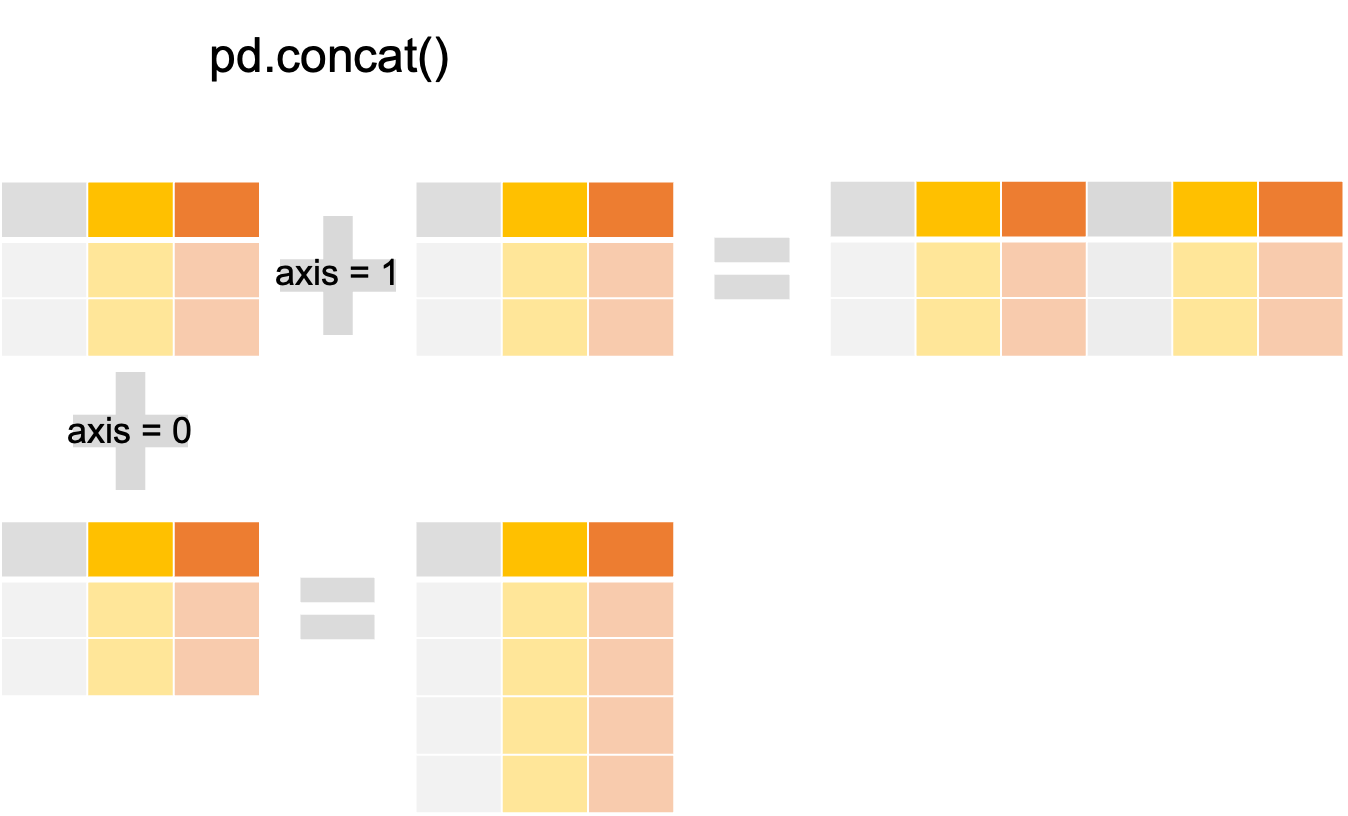

In [38]:
sales_day1 = pd.DataFrame(
        {"date" : ["2023-07-01","2023-07-01", "2023-07-01", "2023-07-01", "2023-07-01"] ,
        "category1" : ["메인", "메인", "사이드", "음료", "사이드"] ,
        "category2" : ["양념치킨", "간장치킨", "치즈볼", "콜라", "감자튀김"],
        "count" : [1, 2, 1, 4, 1], 
        "price" : [20000, 50000, 6000, 8000, 8000]})

In [39]:
sales_day2 = pd.DataFrame(
        {"date" : ["2023-07-02","2023-07-02", "2023-07-02", "2023-07-02", "2023-07-02"] ,
        "category1" : ["사이드", "메인", "메인", "음료", "메인"] ,
        "category2" : ["국물떡볶이", "간장치킨", "후라이드", "제로콜라", "양념치킨"],
        "count" : [1, 3, 1, 3, 2], 
        "price" : [10000, 75000, 18000, 9000, 40000]})

In [40]:
sales_day1

,date,category1,category2,count,price
0,2023-07-01,메인,양념치킨,1,20000
1,2023-07-01,메인,간장치킨,2,50000
2,2023-07-01,사이드,치즈볼,1,6000
3,2023-07-01,음료,콜라,4,8000
4,2023-07-01,사이드,감자튀김,1,8000


In [41]:
sales_day2

,date,category1,category2,count,price
0,2023-07-02,사이드,국물떡볶이,1,10000
1,2023-07-02,메인,간장치킨,3,75000
2,2023-07-02,메인,후라이드,1,18000
3,2023-07-02,음료,제로콜라,3,9000
4,2023-07-02,메인,양념치킨,2,40000


In [25]:
pd.concat([sales_day1, sales_day2]) #concat의 default값 axis=0(세로결합)
# 같은 형식인데 파일 여러개 일때 합치기 좋음 

,date,category1,category2,count,price
0,2023-07-01,메인,양념치킨,1,20000
1,2023-07-01,메인,간장치킨,2,50000
2,2023-07-01,사이드,치즈볼,1,6000
3,2023-07-01,음료,콜라,4,8000
4,2023-07-01,사이드,감자튀김,1,8000
0,2023-07-02,사이드,국물떡볶이,1,10000
1,2023-07-02,메인,간장치킨,3,75000
2,2023-07-02,메인,후라이드,1,18000
3,2023-07-02,음료,제로콜라,3,9000
4,2023-07-02,메인,양념치킨,2,40000


In [42]:
pd.concat([sales_day1, sales_day2], axis = 1)
#axis = 0과 1의 차이 

,date,category1,category2,count,price,date,category1,category2,count,price
0,2023-07-01,메인,양념치킨,1,20000,2023-07-02,사이드,국물떡볶이,1,10000
1,2023-07-01,메인,간장치킨,2,50000,2023-07-02,메인,간장치킨,3,75000
2,2023-07-01,사이드,치즈볼,1,6000,2023-07-02,메인,후라이드,1,18000
3,2023-07-01,음료,콜라,4,8000,2023-07-02,음료,제로콜라,3,9000
4,2023-07-01,사이드,감자튀김,1,8000,2023-07-02,메인,양념치킨,2,40000


In [44]:
sales_day3 = pd.DataFrame(
        {"date" : ["2023-07-03","2023-07-03", "2023-07-03", "2023-07-03"] ,
        "category1" : ["사이드", "메인", "메인", "음료"] ,
        "category2" : ["국물떡볶이", "간장치킨", "후라이드", "제로콜라"],
        "count" : [1, 3, 1, 3], 
        "price" : [10000, 75000, 18000, 9000]})

In [45]:
pd.concat([sales_day2, sales_day3], axis = 1) #행의길이가 안맞으므로 결합 후 비어있는값은 null

,date,category1,category2,count,price,date,category1,category2,count,price
0,2023-07-02,사이드,국물떡볶이,1,10000,2023-07-03,사이드,국물떡볶이,1.0,10000.0
1,2023-07-02,메인,간장치킨,3,75000,2023-07-03,메인,간장치킨,3.0,75000.0
2,2023-07-02,메인,후라이드,1,18000,2023-07-03,메인,후라이드,1.0,18000.0
3,2023-07-02,음료,제로콜라,3,9000,2023-07-03,음료,제로콜라,3.0,9000.0
4,2023-07-02,메인,양념치킨,2,40000,NaN,NaN,NaN,NaN,NaN


In [46]:
sales_day3_ver2 = pd.DataFrame(
        {"date" : ["2023-07-03","2023-07-03", "2023-07-03", "2023-07-03"] ,
        "category1" : ["사이드", "메인", "메인", "음료"] ,
        "category2" : ["국물떡볶이", "간장치킨", "후라이드", "제로콜라"],
        "count" : [1, 3, 1, 3], 
        "가격" : [10000, 75000, 18000, 9000]})

In [47]:
sales_day3_ver2

,date,category1,category2,count,가격
0,2023-07-03,사이드,국물떡볶이,1,10000
1,2023-07-03,메인,간장치킨,3,75000
2,2023-07-03,메인,후라이드,1,18000
3,2023-07-03,음료,제로콜라,3,9000


In [48]:
pd.concat([sales_day3, sales_day3_ver2], axis = 0)
#컬럼명 틀리지 않게 해 ! 

,date,category1,category2,count,price,가격
0,2023-07-03,사이드,국물떡볶이,1,10000.0,NaN
1,2023-07-03,메인,간장치킨,3,75000.0,NaN
2,2023-07-03,메인,후라이드,1,18000.0,NaN
3,2023-07-03,음료,제로콜라,3,9000.0,NaN
0,2023-07-03,사이드,국물떡볶이,1,NaN,10000.0
1,2023-07-03,메인,간장치킨,3,NaN,75000.0
2,2023-07-03,메인,후라이드,1,NaN,18000.0
3,2023-07-03,음료,제로콜라,3,NaN,9000.0
